# Instagram Reach Forecasting


#### Q.1: Import data and check null values, column info, and descriptive statistics of the data.


In [1]:
import pandas as pd
import numpy as np


In [2]:
data=pd.read_csv("Instagram-Reach.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [4]:
data.describe()

,Instagram reach
count,365.000000
mean,50474.712329
std,30051.787552
min,7620.000000
25%,25070.000000
50%,43987.000000
75%,68331.000000
max,161998.000000


In [5]:
data.isnull().sum()

Date               0
Instagram reach    0
dtype: int64

In [6]:
data.head(5)

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


#### Q.2: You can convert the Date column into datetime datatype to move forward. Analyzing Reach


In [7]:
data['Date']=pd.to_datetime(data['Date'])

In [8]:
data.head(5)

,Date,Instagram reach
0,2022-04-01,7620
1,2022-04-02,12859
2,2022-04-03,16008
3,2022-04-04,24349
4,2022-04-05,20532


#### Q.3: Analyze the trend of Instagram reach over time using a line chart

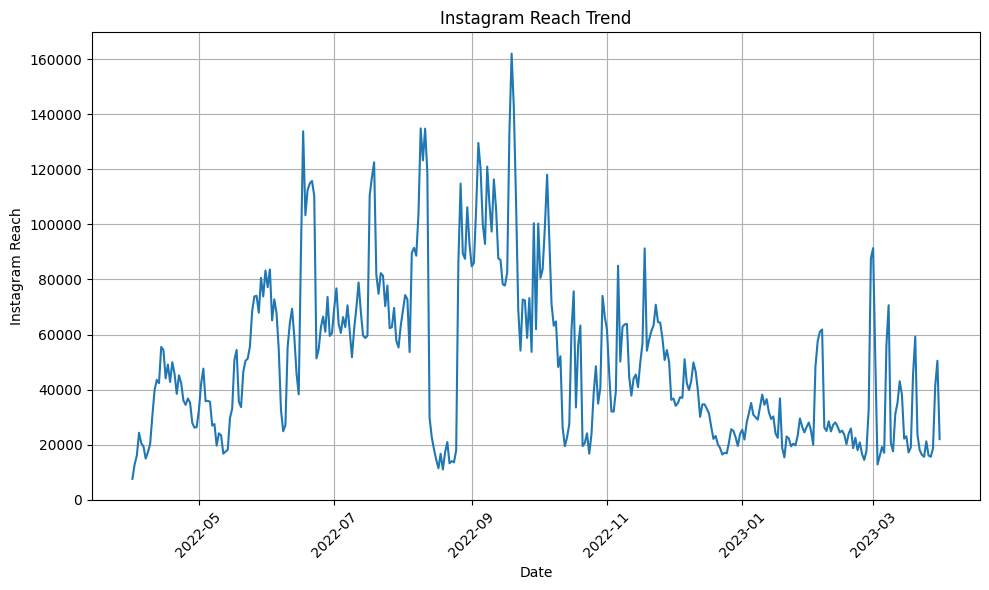

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Instagram reach'],  linestyle='-')
plt.title('Instagram Reach Trend')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.grid(True)
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()


#### Q.4: Analyze Instagram reach for each day using a bar chart

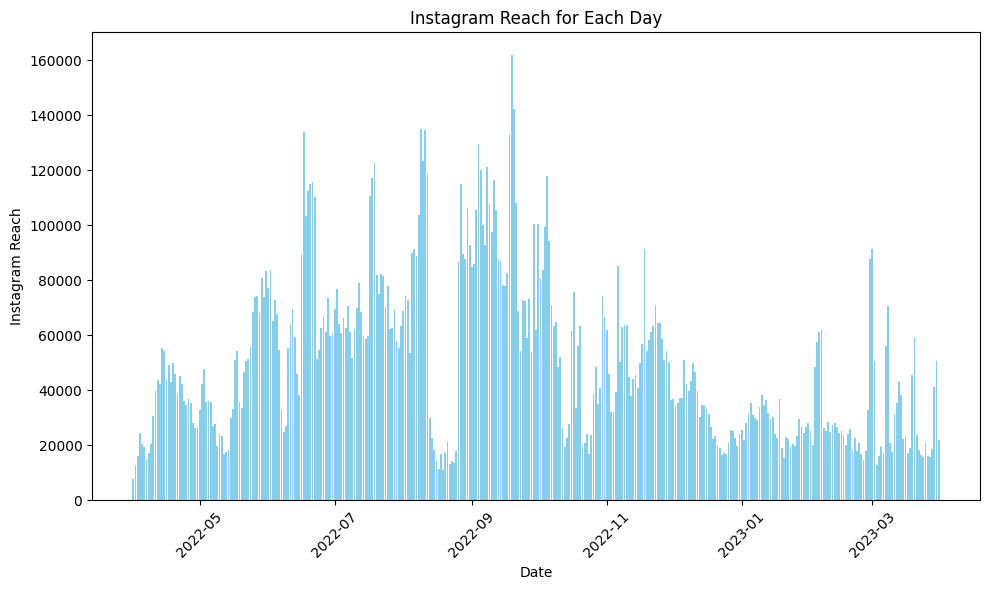

In [10]:
plt.figure(figsize=(10, 6))
plt.bar(data['Date'], data['Instagram reach'], color='skyblue')
plt.title('Instagram Reach for Each Day')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### Q.5: Analyze the distribution of Instagram reach using a box plot.

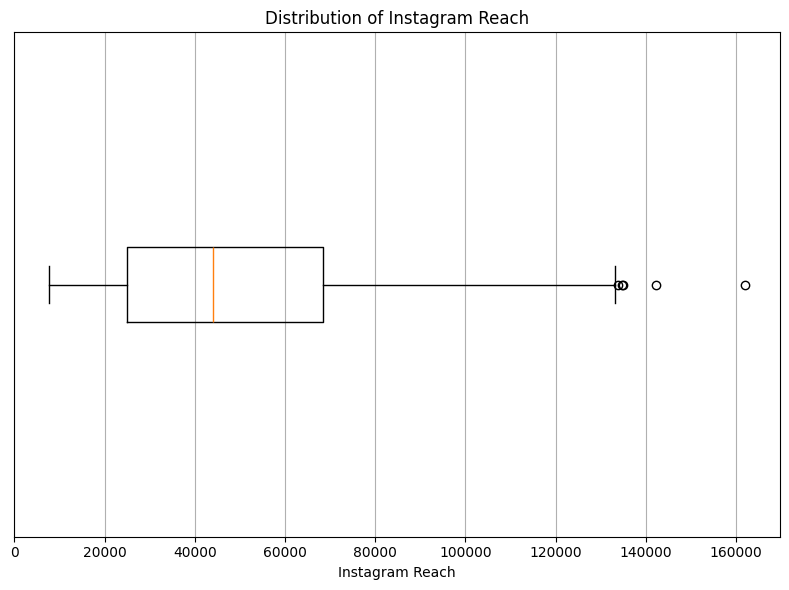

In [11]:
plt.figure(figsize=(8, 6))
plt.boxplot(data['Instagram reach'], vert=False)
plt.title('Distribution of Instagram Reach')
plt.xlabel('Instagram Reach')
plt.yticks([])  
plt.grid(True)
plt.tight_layout()
plt.show()

#### Q.5: Now create a day column and analyze reach based on the days of the week. To create aday column, you can use the python method to extract the day of the week from the Date column.


In [12]:
data['Day']=data['Date'].dt.day_name()

In [13]:
data.head(5)

,Date,Instagram reach,Day
0,2022-04-01,7620,Friday
1,2022-04-02,12859,Saturday
2,2022-04-03,16008,Sunday
3,2022-04-04,24349,Monday
4,2022-04-05,20532,Tuesday


#### Q.6: Now analyze the reach based on the days of the week. For this, you can group the DataFrame by the Day column and calculate the mean, median, and standard deviation of the Instagram reach column for each day.

In [14]:
reach_stats_by_day = data.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std'])

print(reach_stats_by_day)

                   mean   median           std
Day                                           
Friday     46666.849057  35574.0  29856.943036
Monday     52621.692308  46853.0  32296.071347
Saturday   47374.750000  40012.0  27667.043634
Sunday     53114.173077  47797.0  30906.162384
Thursday   48570.923077  39150.0  28623.220625
Tuesday    54030.557692  48786.0  32503.726482
Wednesday  51017.269231  42320.5  29047.869685


#### Q.7: Now create a bar chart to visualize the reach for each day of the week.


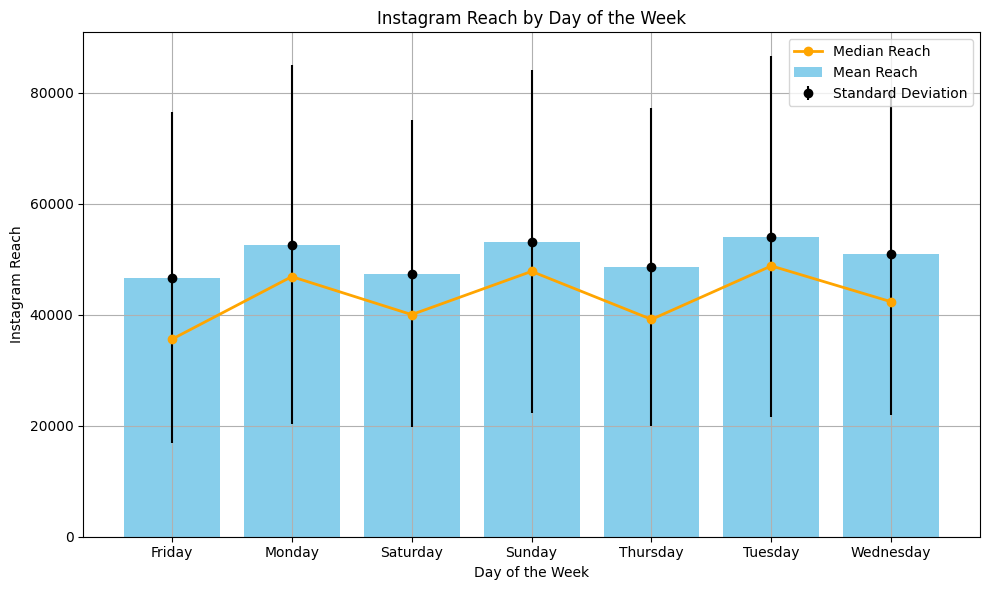

In [15]:

plt.figure(figsize=(10, 6))
days_of_week = reach_stats_by_day.index
mean_reach = reach_stats_by_day['mean']
median_reach = reach_stats_by_day['median']
std_reach = reach_stats_by_day['std']

plt.bar(days_of_week, mean_reach, color='skyblue', label='Mean Reach')
plt.errorbar(days_of_week, mean_reach, yerr=std_reach, fmt='o', color='black', label='Standard Deviation')
plt.plot(days_of_week, median_reach, color='orange', marker='o', linestyle='-', linewidth=2, label='Median Reach')

plt.title('Instagram Reach by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Instagram Reach')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#### Q.8: Check the Trends and Seasonal patterns of Instagram reach.


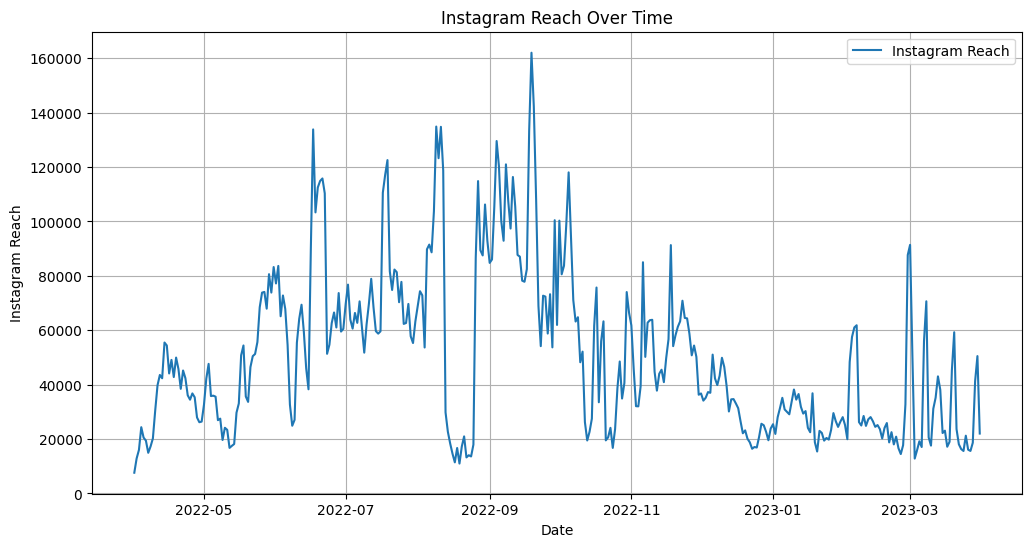

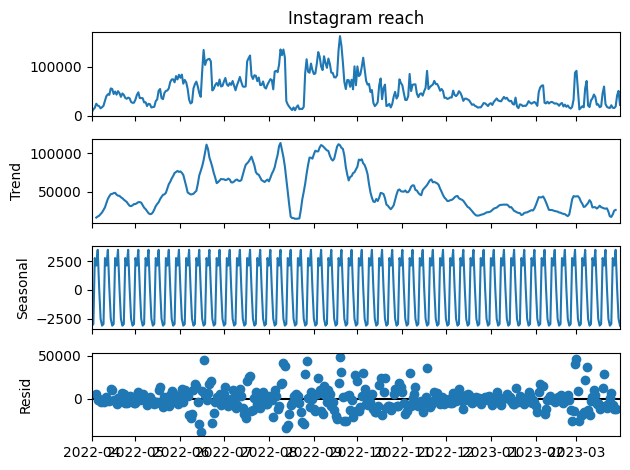

In [16]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Visualize time series data
plt.figure(figsize=(12, 6))
plt.plot(data['Instagram reach'], label='Instagram Reach')
plt.title('Instagram Reach Over Time')
plt.xlabel('Date')
plt.ylabel('Instagram Reach')
plt.legend()
plt.grid(True)
plt.show()

# Decompose time series to identify trends and seasonal patterns
decomposition = sm.tsa.seasonal_decompose(data['Instagram reach'], model='additive')
fig = decomposition.plot()
plt.show()


#### Q.9: You can use the SARIMA model to forecast the reach of the Instagram account. You need to find p, d, and q values to forecast the reach of Instagram. To find the value of d, you can use the autocorrelation plot, and to find the value of q, you can use a partial autocorrelation plot. The value of d will be 1. You have to visualize an autocorrelation plot to find the value of p,partial autocorrelation plot to find the value of q,


<Axes: xlabel='Lag', ylabel='Autocorrelation'>

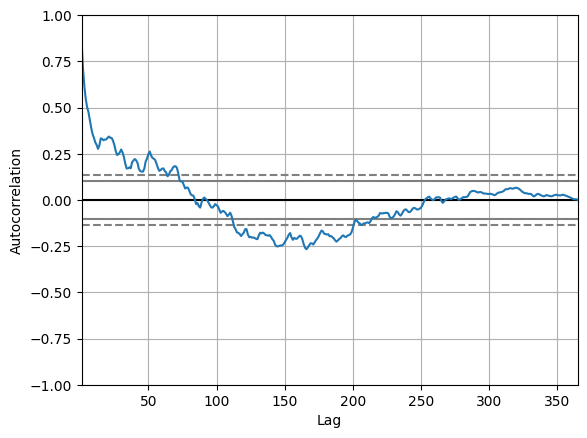

In [17]:
#visualize an autocorrelation plot to find the value of p
pd.plotting.autocorrelation_plot(data["Instagram reach"])

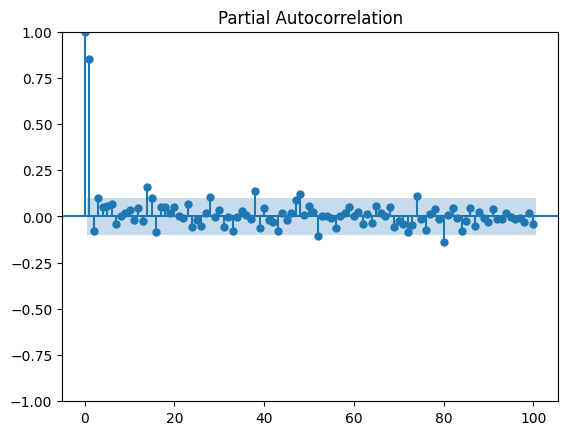

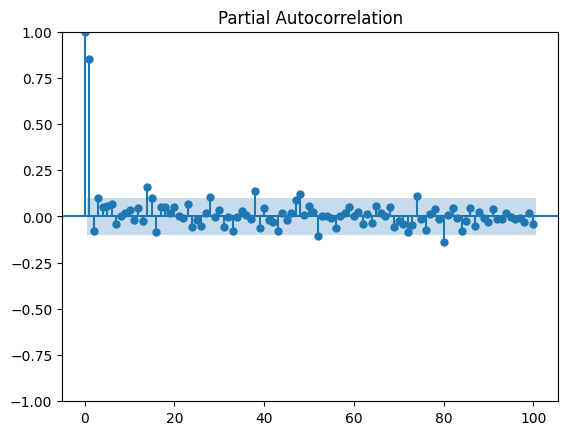

In [18]:
# visualize a partial autocorrelation plot to find the value of q
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Instagram reach"], lags = 100)

#### Q.10: You have to train a model using SARIMA and make predictions

In [20]:
import statsmodels.api as sm
import warnings

# Suppress warnings for simplicity
warnings.filterwarnings("ignore")

# Train SARIMA model
model = sm.tsa.statespace.SARIMAX(data['Instagram reach'], order=(p, d, q), seasonal_order=(p, d, q, 12))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


                                     SARIMAX Results                                      
Dep. Variable:                    Instagram reach   No. Observations:                  365
Model:             SARIMAX(8, 1, 2)x(8, 1, 2, 12)   Log Likelihood               -3938.514
Date:                            Tue, 21 May 2024   AIC                           7919.028
Time:                                    22:03:05   BIC                           8000.164
Sample:                                04-01-2022   HQIC                          7951.316
                                     - 03-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1891      6.427      0.029      0.977     -12.407      12.786
ar.L2          0.4765      5.985   

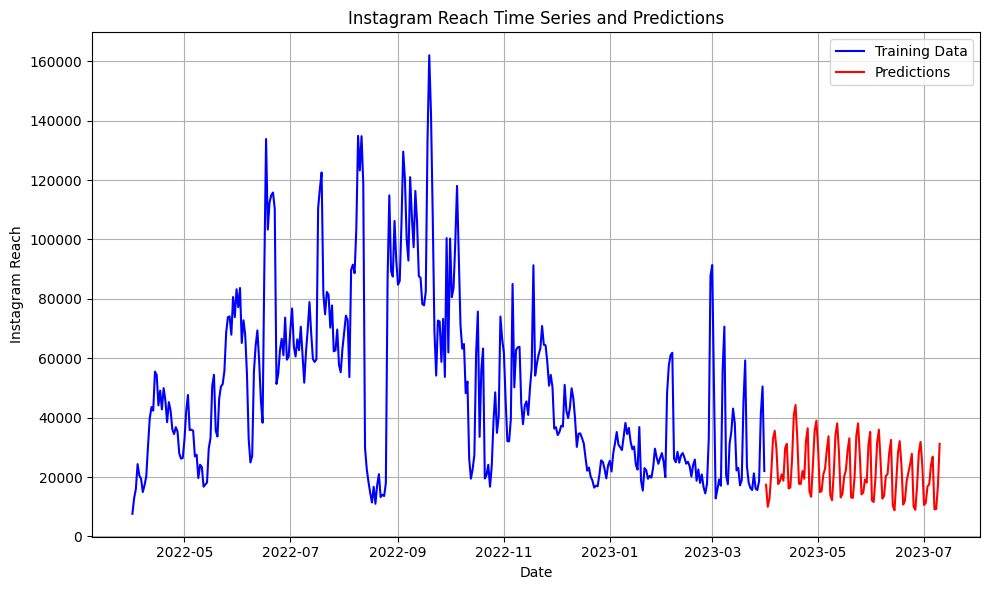

In [22]:
import matplotlib.pyplot as plt

# Generate predictions
predictions = model_fit.predict(start=len(data), end=len(data)+100)

# Plot training data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data["Instagram reach"], label="Training Data", color="blue")

# Plot predictions
plt.plot(predictions.index, predictions, label="Predictions", color="red")

# Set titles and labels
plt.title("Instagram Reach Time Series and Predictions")
plt.xlabel("Date")
plt.ylabel("Instagram Reach")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
